# Content:
1. [Newton Raphson: 1D](#1.-Newton-Raphson:-1D)
2. [Newton Raphson: nD](#2.-Newton-Raphson:-nD)
3. ['n' equations with 'm' unknowns: use of pseudoinverse](#3.-'n'-equations-with-'m'-unknowns:-use-of-pseudoinverse)

## 1. Newton Raphson: 1D 

![boardwork047.jpg](../boardwork/boardwork047.jpg)
![boardwork048.jpg](../boardwork/boardwork048.jpg)
![boardwork049.jpg](../boardwork/boardwork049.jpg)
![boardwork050.jpg](../boardwork/boardwork050.jpg)

In [1]:
import numpy as np

def NewtonRaphson(x0, f, df, maxiter, maxeval, xthresh, iprint):
    
    iiter=0
    ieval=0
    
    dx = 999.0
    
    if iprint == 1:
        print('#iter feval   xn             f(xn)          df(xn)         xn+1           dx')
    
    while dx > xthresh:
        
        fn=f(x0)
        dfn=df(x0)
        
        if (dfn < xthresh): # handle an exception
            print('WARNING: The gradient at initial guess is small. Stopping.')
            break

        x1 = x0 - fn / dfn
        
        ieval=ieval+2
        
        dx=abs(x1-x0)
        
        print('{:5d}{:5d}{:15.6e}{:17.8e}{:17.8e}{:17.8e}{:17.8e}'.format(iiter, ieval, x0, fn, dfn, x1, dx))
        
        iiter=iiter+1
        
        if iiter >= maxiter:
            print('Exiting Newton-Raphson, maximum iterations reached')
            break
            
        if ieval >= maxeval:
            print('Exiting Newton-Raphson, maximum function evaluations reached')
            break
            
        x0 = x1
        
    print('Exiting Newton-Raphson, convergence reached')  
    return x1



In [2]:
def f(x):
    val=np.exp(-x)+x/5.0-1.0
    return val

def df(x):
    val=-np.exp(-x)+1.0/5.0
    return val

x0=2.0
iprint=1
maxiter=100
maxeval=100
xthresh=0.0001
x=NewtonRaphson(x0,f,df,maxiter,maxeval,xthresh,iprint)
print('The solution is: ',x)

#iter feval   xn             f(xn)          df(xn)         xn+1           dx
    0    2   2.000000e+00  -4.64664717e-01   6.46647168e-02   9.18575353e+00   7.18575353e+00
    1    4   9.185754e+00   8.37253195e-01   1.99897511e-01   4.99734122e+00   4.18841231e+00
    2    6   4.997341e+00   6.22412954e-03   1.93244114e-01   4.96513258e+00   3.22086370e-02
    3    8   4.965133e+00   3.54219278e-06   1.93022974e-01   4.96511423e+00   1.83511460e-05
Exiting Newton-Raphson, convergence reached
The solution is:  4.965114231750363


In [3]:
# Find sqrt(5)
def f(x):
    val=x**2-5.0
    return val

def df(x):
    val=2*x
    return val

x0=1
iprint=1
maxiter=100
maxeval=100
xthresh=1e-14
x=NewtonRaphson(x0,f,df,maxiter,maxeval,xthresh,iprint)
print('Newton-Raphson solution is: ',x)
print('Exact solution is: ',np.sqrt(5.0))

#iter feval   xn             f(xn)          df(xn)         xn+1           dx
    0    2   1.000000e+00  -4.00000000e+00   2.00000000e+00   3.00000000e+00   2.00000000e+00
    1    4   3.000000e+00   4.00000000e+00   6.00000000e+00   2.33333333e+00   6.66666667e-01
    2    6   2.333333e+00   4.44444444e-01   4.66666667e+00   2.23809524e+00   9.52380952e-02
    3    8   2.238095e+00   9.07029478e-03   4.47619048e+00   2.23606890e+00   2.02634245e-03
    4   10   2.236069e+00   4.10606373e-06   4.47213779e+00   2.23606798e+00   9.18143385e-07
    5   12   2.236068e+00   8.42881320e-13   4.47213595e+00   2.23606798e+00   1.88293825e-13
    6   14   2.236068e+00   8.88178420e-16   4.47213595e+00   2.23606798e+00   0.00000000e+00
Exiting Newton-Raphson, convergence reached
Newton-Raphson solution is:  2.23606797749979
Exact solution is:  2.23606797749979


![boardwork053.jpg](../boardwork/boardwork053.jpg)
![boardwork054.jpg](../boardwork/boardwork054.jpg)
![boardwork055.jpg](../boardwork/boardwork055.jpg)

### When will Newton-Raphson fail?

![boardwork052.jpg](../boardwork/boardwork052.jpg)
![boardwork051.jpg](../boardwork/boardwork051.jpg)

## 2. Newton Raphson: nD 

![boardwork056.jpg](../boardwork/boardwork056.jpg)
![boardwork057.jpg](../boardwork/boardwork057.jpg)

In [4]:
import numpy as np

def NewtonRaphson_nD(X0,fnF,fnJ,maxiter,maxeval,xthresh,iprint):
    
    iiter=0
    ieval=0
    
    N=len(X0)
    
    X1=np.zeros(N)
    
    F=np.zeros(N,float)
    J=np.zeros([N,N],float)
    Jinv=np.zeros([N,N],float)
 
    dx=999.0
    
    while dx > xthresh:
                
        F=fnF(X0)
        ieval=ieval+N
        
        J=fnJ(X0)
        ieval=ieval+N**2
                
        Jinv = np.linalg.inv(J)

        X1 = X0 - np.dot(Jinv,F)
        
        # converge the maximum component in X0-X1
        dx=max(abs(X0-X1))
        
        if iprint == 1:
            print('{:6d}{:6d}{:17.8e} x='.format(iiter, ieval, dx))
            for iX in X0:
                print('{:17.8e}'.format(iX))
        
        if iiter >= maxiter:
            print('Exiting fixed-point iteration, maximum function evaluations reached')
            break
            
        iiter=iiter+1
        
        if iiter >= maxiter:
            print('Exiting Newton-Raphson, maximum iterations reached')
            break
            
        if ieval >= maxeval:
            print('Exiting Newton-Raphson, maximum function evaluations reached')
            break
        
        X0 = X1
        
    print('Exiting Newton-Raphson, convergence reached')  
    return X1

![boardwork060.jpg](../boardwork/boardwork060.jpg)

In [5]:
import numpy as np

def fnF(X):
    x1=X[0]
    x2=X[1]
    
    N=len(X)
    
    Fvec=np.zeros(N)
    
    Fvec[0] = x1**2 + x2**2 - 1.0
    Fvec[1] = np.sin(np.pi*x1/2.0) + x2**3
    
    return Fvec

def fnJ(X):
    x1=X[0]
    x2=X[1]
    
    N=len(X)
    
    Jmat=np.zeros([N,N])
    
    Jmat[0][0] = 2*x1
    Jmat[0][1] = 2*x2
    Jmat[1][0] = (np.pi/2.0) * np.cos(np.pi*x1/2.0)
    Jmat[1][1] = 3*x2**2
    
    return Jmat

In [6]:
X0=np.array([5.0,-7.0])
maxiter=100
maxeval=100
xthresh=1e-6  # 10^-6
iprint=1
X=NewtonRaphson_nD(X0,fnF,fnJ,maxiter,maxeval,xthresh,iprint)
print('The solution is: ',X)

     0     6   4.04285714e+00 x=
   5.00000000e+00
  -7.00000000e+00
     1    12   3.80379583e+00 x=
   9.57142857e-01
  -4.67346939e+00
     2    18   1.83004101e+00 x=
  -2.84665298e+00
  -3.12473917e+00
     3    24   7.75498525e-01 x=
  -1.01661197e+00
  -2.09290189e+00
     4    30   2.00643433e+00 x=
  -4.42325218e-01
  -1.31740337e+00
     5    36   1.56502471e+00 x=
  -2.44875955e+00
  -2.90308591e-01
     6    42   9.48505811e-01 x=
  -1.59689515e+00
   1.27471612e+00
     7    48   2.54806827e-01 x=
  -6.48389339e-01
   1.21758707e+00
     8    54   7.72299919e-02 x=
  -4.30597350e-01
   9.62780241e-01
     9    60   6.11942123e-03 x=
  -4.72807492e-01
   8.85550249e-01
    10    66   3.74173177e-05 x=
  -4.76077261e-01
   8.79430828e-01
    11    72   1.37002432e-09 x=
  -4.76095822e-01
   8.79393410e-01
Exiting Newton-Raphson, convergence reached
The solution is:  [-0.47609582  0.87939341]


### Let's check our answer with a graphical solution

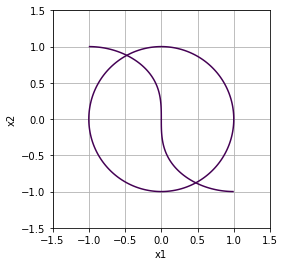

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1.0, 1.0, 100)
x2 = np.linspace(-1.0, 1.0, 100)

X1, X2 = np.meshgrid(x1,x2)

F1 = X1**2 + X2**2 - 1.0

F2 = np.sin(np.pi*X1/2.0) + X2**3

#=== make it a square plot
fig = plt.figure()                        # comment if square plot is not needed
ax = fig.add_subplot(111)                 # comment if square plot is not needed

plt.contour(X1,X2,F1,[0])  # f1(X)
plt.contour(X1,X2,F2,[0])  # f2(X)

ax.set_aspect('equal', adjustable='box')  # comment if square plot is not needed

#=== labels, titles, grids
plt.xlabel("x1")
plt.ylabel("x2")

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.grid()

#=== display
plt.show()

There are two solutions. One near (0.5, -0.8) and another near (-0.5,0.8).

## 3. 'n' equations with 'm' unknowns: use of pseudoinverse

![boardwork058.jpg](../boardwork/boardwork058.jpg)